## ** Bitcoin Price Forecasting ** A Comparison Between LSTM and ARIMA Algorithms

![Bitcoin As Commodity](cryptocurrency-bitcoin-golden-coin-background_1017-31505.avif)


Proyek ini bertujuan untuk melakukan perbandingan antara dua pendekatan peramalan yang populer, yaitu Long Short-Term Memory (LSTM) dan Autoregressive Integrated Moving Average (ARIMA), dalam memprediksi harga Bitcoin. Bitcoin, sebagai salah satu aset kripto paling terkenal, memiliki volatilitas harga yang tinggi, menjadikannya tantangan bagi para analis dan investor untuk memprediksi pergerakan harga di masa depan.

## Tahapan:
- EDA
- Pembuatan Model LSTM
- Pembuatan Model Arima

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Portofolio_FityanSetyawan/Forecasting_bitcoin/

'Bitcoin Forecasting.ipynb'   btcusd_1-min_data.csv


Importing Dataset 

In [3]:
path = "/content/drive/MyDrive/Portofolio_FityanSetyawan/Forecasting_bitcoin/btcusd_1-min_data.csv"
df1 = pd.read_csv(path)
df1.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


**Preparing the Data**

In [4]:
df1.isnull().sum()

,0
Timestamp,1
Open,0
High,0
Low,0
Close,0
Volume,0


In [5]:
df2 = df1[["Timestamp", "Close"]].copy()
df2 = df2.rename(columns={'Timestamp': 'Date'})
df2= df2.dropna()
df2.isnull().sum()


,0
Date,0
Close,0


In [6]:
df2['Date'] = pd.to_datetime(df2['Date'], unit='s')
df2.head()

,Date,Close
0,2012-01-01 10:01:00,4.58
1,2012-01-01 10:02:00,4.58
2,2012-01-01 10:03:00,4.58
3,2012-01-01 10:04:00,4.58
4,2012-01-01 10:05:00,4.58


Cek Data dalam 1 hari

In [ ]:
df_filtered = df2[df2['Date'].dt.date == pd.to_datetime('2012-01-01').date()]


df_filtered

,Date,Close
0,2012-01-01 10:01:00,4.58
1,2012-01-01 10:02:00,4.58
2,2012-01-01 10:03:00,4.58
3,2012-01-01 10:04:00,4.58
4,2012-01-01 10:05:00,4.58
...,...,...
834,2012-01-01 23:55:00,4.84
835,2012-01-01 23:56:00,4.84
836,2012-01-01 23:57:00,4.84
837,2012-01-01 23:58:00,4.84


In [8]:
df_daily = df2.resample('D', on='Date').last()
df_daily.head()

,Close
Date,
2012-01-01,4.84
2012-01-02,5.00
2012-01-03,5.29
2012-01-04,5.57
2012-01-05,6.42


Grafik Penutupan Harga Bicoin 

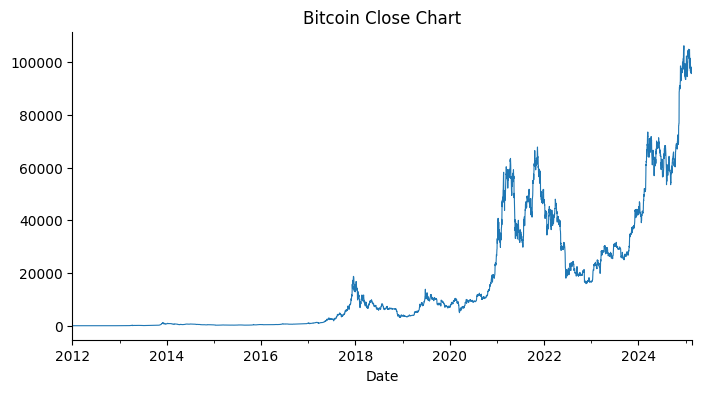

In [9]:
from matplotlib import pyplot as plt
df_daily['Close'].plot(kind='line', figsize=(8, 4),linewidth = 0.8, title='Bitcoin Close Chart')
plt.gca().spines[['top', 'right']].set_visible(False)

Start Kode

In [ ]:
df_daily.tail()

,Close
Date,
2025-02-17,96060.0
2025-02-18,95612.0
2025-02-19,95564.0
2025-02-20,98337.0
2025-02-21,98426.0


Split data

In [10]:
train_size = int(len(df_daily) * 0.7)
test_size = int(len(df_daily) * 0.2)
valid_size = len(df_daily) - train_size - test_size

# Pisahkan data berdasarkan urutan waktu
data_train = df_daily.iloc[:train_size]  # Dari awal sampai 70%
data_test = df_daily.iloc[train_size:train_size+test_size]  # 20% setelahnya
data_valid = df_daily.iloc[train_size+test_size:]  # Sisanya untuk validasi/model baru

print("Train size:", data_train.shape)
print("Test size:", data_test.shape)
print("Validation size:", data_valid.shape)

Train size: (3360, 1)
Test size: (960, 1)
Validation size: (481, 1)


In [11]:
data_train.head()

,Close
Date,
2012-01-01,4.84
2012-01-02,5.00
2012-01-03,5.29
2012-01-04,5.57
2012-01-05,6.42


**LSTM**

In [12]:
data_train1=data_train.reset_index()["Close"]
data_test1= data_test.reset_index()["Close"]
data_train1.head()

,Close
0,4.84
1,5.00
2,5.29
3,5.57
4,6.42


fit_transform() hanya untuk data_train

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

data_train1 = scaler.fit_transform(data_train1.values.reshape(-1,1))
data_test1 = scaler.transform(data_test1.values.reshape(-1,1))

In [ ]:
data_test1

array([[0.99368293],
       [0.93924346],
       [0.92497657],
       [0.96043332],
       [0.94982338],
       [0.97661113],
       [0.98291227],
       [0.95503132],
       [0.9220174 ],
       [0.91232502],
       [0.90725889],
       [0.86546898],
       [0.8933632 ],
       [0.92615105],
       [0.91596439],
       [0.95638891],
       [0.98049282],
       [0.97159343],
       [0.97686141],
       [0.97627807],
       [0.97249125],
       [0.96142054],
       [0.97898596],
       [0.96621581],
       [0.93087898],
       [0.95766407],
       [0.96812307],
       [0.98762196],
       [0.98948808],
       [0.99576501],
       [1.04560377],
       [1.03059364],
       [1.05251197],
       [1.02576404],
       [1.00763867],
       [0.92598717],
       [0.9292162 ],
       [0.93936504],
       [0.92077144],
       [0.8782922 ],
       [0.84485666],
       [0.8413445 ],
       [0.81953017],
       [0.89726679],
       [0.90962509],
       [0.91983282],
       [0.87715006],
       [0.946

**Data Preprocessing Untuk LSTM**

In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(data_train1, time_step)
X_test, y_test = create_dataset(data_test1, time_step)

In [16]:
X_train

array([[7.62970962e-06, 1.02835217e-05, 1.50935560e-05, ...,
        5.30762409e-06, 6.30280360e-06, 7.79557288e-06],
       [1.02835217e-05, 1.50935560e-05, 1.97377271e-05, ...,
        6.30280360e-06, 7.79557288e-06, 6.96625661e-06],
       [1.50935560e-05, 1.97377271e-05, 3.38361036e-05, ...,
        7.79557288e-06, 6.96625661e-06, 8.29316264e-06],
       ...,
       [3.18090058e-01, 3.10902540e-01, 3.15230410e-01, ...,
        8.35895395e-01, 8.42398728e-01, 8.94324541e-01],
       [3.10902540e-01, 3.15230410e-01, 3.21811366e-01, ...,
        8.42398728e-01, 8.94324541e-01, 9.40823972e-01],
       [3.15230410e-01, 3.21811366e-01, 3.16243668e-01, ...,
        8.94324541e-01, 9.40823972e-01, 9.54057206e-01]])

In [17]:
y_train

array([6.96625661e-06, 8.29316264e-06, 7.96143613e-06, ...,
       9.40823972e-01, 9.54057206e-01, 9.51375529e-01])

In [18]:
print(X_train.shape)

(3259, 100)


In [19]:
print(y_train.shape)

(3259,)


In [20]:
print(X_train.shape[1])

100


# LSTM

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(Dropout(0.2))  # Dropout 20%
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 227ms/step - loss: 0.0062 - val_loss: 0.0029
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - loss: 7.0877e-04 - val_loss: 0.0042
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - loss: 5.7696e-04 - val_loss: 0.0121
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - loss: 6.3060e-04 - val_loss: 0.0039
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - loss: 5.0001e-04 - val_loss: 0.0052
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 174ms/step - loss: 6.0873e-04 - val_loss: 0.0060
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - loss: 5.6624e-04 - val_loss: 0.0056
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - loss: 7.0849e-04 - val_loss: 0.0063
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - loss: 4.5582e-04 - val_loss: 0.0103
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - loss: 6.9022e-04 - val_loss: 0.0023
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - loss: 4.9459e-04 - val_los

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step


In [26]:
test_predict

array([[0.6254948 ],
       [0.6057959 ],
       [0.593498  ],
       [0.59599537],
       [0.59357274],
       [0.58635384],
       [0.58426416],
       [0.5924711 ],
       [0.611926  ],
       [0.62411183],
       [0.6225089 ],
       [0.6165929 ],
       [0.6166874 ],
       [0.6230897 ],
       [0.6241076 ],
       [0.62159914],
       [0.62080437],
       [0.6138983 ],
       [0.6077052 ],
       [0.6032622 ],
       [0.60264033],
       [0.5991511 ],
       [0.5927478 ],
       [0.588516  ],
       [0.58135605],
       [0.57620585],
       [0.57300365],
       [0.57058525],
       [0.56516683],
       [0.5557573 ],
       [0.5546775 ],
       [0.56120545],
       [0.5688702 ],
       [0.58176625],
       [0.5959806 ],
       [0.6290774 ],
       [0.65498364],
       [0.6817434 ],
       [0.6983915 ],
       [0.70704854],
       [0.71642816],
       [0.72301996],
       [0.7170454 ],
       [0.70205176],
       [0.69493526],
       [0.6971614 ],
       [0.71228856],
       [0.733

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
test_predict

array([[37715.855],
       [36528.2  ],
       [35786.75 ],
       [35937.316],
       [35791.254],
       [35356.023],
       [35230.035],
       [35724.836],
       [36897.785],
       [37632.477],
       [37535.832],
       [37179.152],
       [37184.85 ],
       [37570.848],
       [37632.223],
       [37480.984],
       [37433.066],
       [37016.695],
       [36643.31 ],
       [36375.438],
       [36337.945],
       [36127.58 ],
       [35741.52 ],
       [35486.38 ],
       [35054.703],
       [34744.195],
       [34551.133],
       [34405.324],
       [34078.645],
       [33511.336],
       [33446.234],
       [33839.81 ],
       [34301.92 ],
       [35079.434],
       [35936.426],
       [37931.85 ],
       [39493.758],
       [41107.117],
       [42110.844],
       [42632.78 ],
       [43198.285],
       [43595.71 ],
       [43235.5  ],
       [42331.523],
       [41902.465],
       [42036.68 ],
       [42948.707],
       [44215.156],
       [45180.48 ],
       [46377.547],


In [ ]:
train_predict.shape

(3259, 1)

In [ ]:
test_predict.shape

(859, 1)

In [ ]:
df_daily.shape

(4801, 1)

In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_error = np.sqrt(mean_squared_error(y_train, train_predict))
test_error = np.sqrt(mean_squared_error(y_test, test_predict))

print(f"Train RMSE: {train_error}")
print(f"Test RMSE: {test_error}")

Train RMSE: 8732.88989711963
Test RMSE: 36511.8536961323


Nilai yang cukup besar antara RMSE train dan test kemungkinan model masih menghafal pola

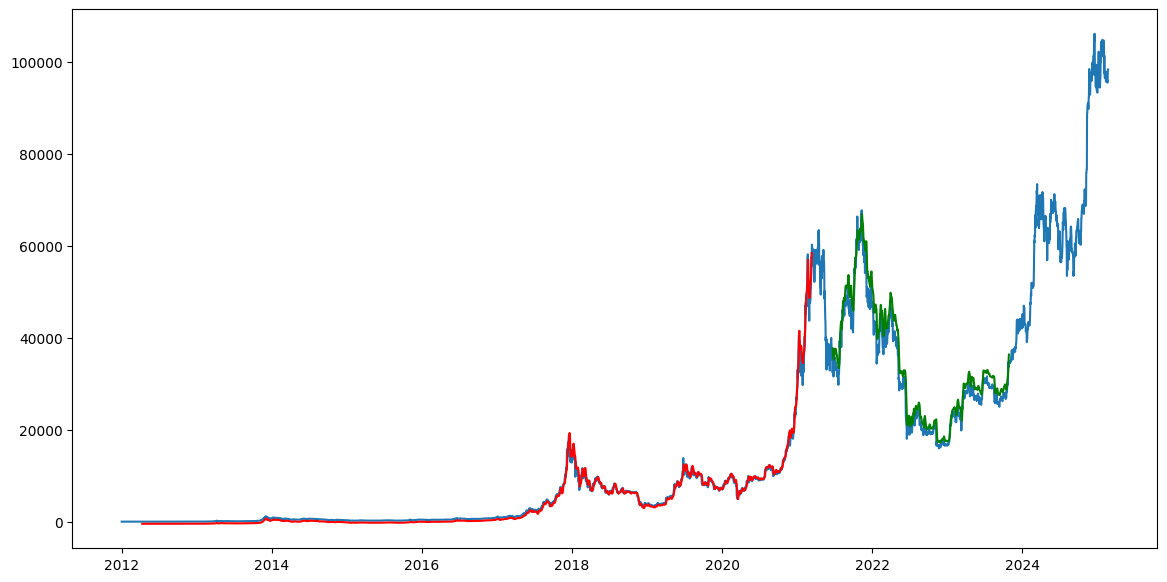

In [56]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df_daily)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

trainPredictPlot_df = pd.DataFrame(trainPredictPlot, index=df_daily.index, columns=['train_predict'])

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_daily)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_daily)-1-len(data_valid), :] = test_predict
testPredictPlot_df = pd.DataFrame(testPredictPlot, index=df_daily.index, columns=['test_predict'])

# shift validation for plotting
validPredictPlot = numpy.empty_like(df_daily)
validPredictPlot[:, :] = numpy.nan
validPredictPlot[len(test_predict)+(look_back*2)+1:len(df_daily), :] = valid_predict
validPredictPlot_df = pd.DataFrame(validPredictPlot, index=df_daily.index, columns=['valid_predict'])

# plot baseline and predictions
plt.figure(figsize=(14,7))
plt.plot(df_daily)
plt.plot(trainPredictPlot_df.index, trainPredictPlot_df, label="Prediksi Training", color='red')
plt.plot(testPredictPlot_df.index, testPredictPlot_df, label="Prediksi Testing", color='green')
plt.show()

In [ ]:
trainPredictPlot.shape

(4801, 1)

Model kembali diimplementasikan untuk data_valid

In [76]:
data_valid1= data_valid.reset_index()["Close"]
data_valid_scaled = scaler.transform(data_valid1.values.reshape(-1,1))

time_step = 100
X_valid, y_valid = create_dataset(data_valid_scaled, time_step)


X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
X_valid

array([[[0.57114381],
        [0.57303465],
        [0.57339955],
        ...,
        [0.70947376],
        [0.70779854],
        [0.71605853]],

       [[0.57303465],
        [0.57339955],
        [0.58038239],
        ...,
        [0.70779854],
        [0.71605853],
        [0.72350579]],

       [[0.57339955],
        [0.58038239],
        [0.57286879],
        ...,
        [0.71605853],
        [0.72350579],
        [0.75100592]],

       ...,

       [[1.27291123],
        [1.47229545],
        [1.47458436],
        ...,
        [1.61706089],
        [1.59440397],
        [1.59320976]],

       [[1.47229545],
        [1.47458436],
        [1.5013381 ],
        ...,
        [1.59440397],
        [1.59320976],
        [1.58577908]],

       [[1.47458436],
        [1.5013381 ],
        [1.50208449],
        ...,
        [1.59320976],
        [1.58577908],
        [1.58498294]]])

In [60]:
data_valid1.shape

(481,)

In [32]:
valid_predict = model.predict(X_valid)

# Kembalikan ke skala asli
valid_predict = scaler.inverse_transform(valid_predict)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [33]:
valid_predict

array([[46172.07 ],
       [46314.42 ],
       [46914.207],
       [48145.97 ],
       [49173.86 ],
       [50063.383],
       [51027.375],
       [51554.926],
       [52395.95 ],
       [53222.035],
       [53768.465],
       [53837.492],
       [53850.81 ],
       [53863.984],
       [53752.527],
       [53457.297],
       [53417.055],
       [53329.434],
       [53360.53 ],
       [53482.496],
       [54179.48 ],
       [55836.355],
       [58401.086],
       [60301.035],
       [61786.062],
       [62539.355],
       [63009.117],
       [64212.832],
       [64424.2  ],
       [65094.082],
       [65695.66 ],
       [66280.29 ],
       [66508.48 ],
       [66808.54 ],
       [67620.91 ],
       [68073.73 ],
       [68766.93 ],
       [68174.9  ],
       [67446.41 ],
       [66443.21 ],
       [66184.84 ],
       [65880.14 ],
       [65150.84 ],
       [65000.92 ],
       [65025.035],
       [64873.695],
       [65081.562],
       [65645.26 ],
       [67497.484],
       [68676.875],


In [52]:
valid_predict.shape

(380, 1)

In [54]:
valid_error = np.sqrt(mean_squared_error(y_valid, valid_predict))

print(f"Validation RMSE: {valid_error}")

Validation RMSE: 69272.51295993305


Rmse semakin jauh Model masih perlu perbaikan

## Prediksi 30 hari kedepan dengan Model LSTM ##

In [41]:
future_predictions = []
time_step =100
input_sequence = data_valid_scaled[-look_back:].reshape(1, time_step, 1)  # Ambil data terakhir

for _ in range(30):  # Prediksi untuk 30 hari ke depan
    next_step = model.predict(input_sequence)  # Prediksi satu langkah
    future_predictions.append(next_step[0, 0])  # Simpan hasil prediksi

    # Update input_sequence dengan prediksi baru
    input_sequence = np.append(input_sequence[:, 1:, :], np.reshape(next_step, (1, 1, 1)), axis=1)

# Kembalikan ke skala asli
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━

In [42]:
future_predictions.shape

(30, 1)

In [44]:
import pandas as pd

last_date = df_daily.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=["Predicted_Close"])
print(future_df)

            Predicted_Close
2025-02-22     82553.796875
2025-02-23     79311.859375
2025-02-24     76501.695312
2025-02-25     74204.031250
2025-02-26     72596.445312
2025-02-27     71590.390625
2025-02-28     71088.015625
2025-03-01     70993.460938
2025-03-02     71219.695312
2025-03-03     71684.242188
2025-03-04     72306.968750
2025-03-05     73009.960938
2025-03-06     73719.296875
2025-03-07     74367.679688
2025-03-08     74897.484375
2025-03-09     75263.812500
2025-03-10     75436.414062
2025-03-11     75400.750000
2025-03-12     75157.867188
2025-03-13     74723.109375
2025-03-14     74123.726562
2025-03-15     73396.031250
2025-03-16     72582.109375
2025-03-17     71726.437500
2025-03-18     70872.773438
2025-03-19     70061.320312
2025-03-20     69326.640625
2025-03-21     68696.023438
2025-03-22     68188.648438
2025-03-23     67815.203125


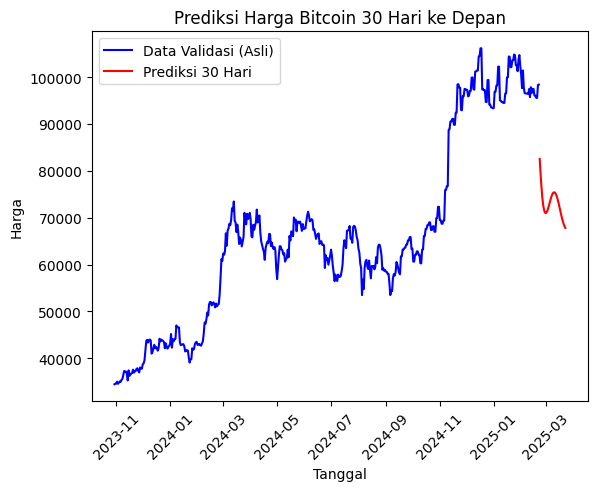

In [49]:
plt.plot(df_daily.index[-len(data_valid):], data_valid, label="Data Validasi (Asli)", color='blue')
plt.plot(future_df.index,future_df["Predicted_Close"], label="Prediksi 30 Hari", color='red')
plt.xticks(rotation=45)  # Miringkan label tanggal di sumbu x
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.title("Prediksi Harga Bitcoin 30 Hari ke Depan")
plt.legend()
plt.show()

Menghitung Error Model

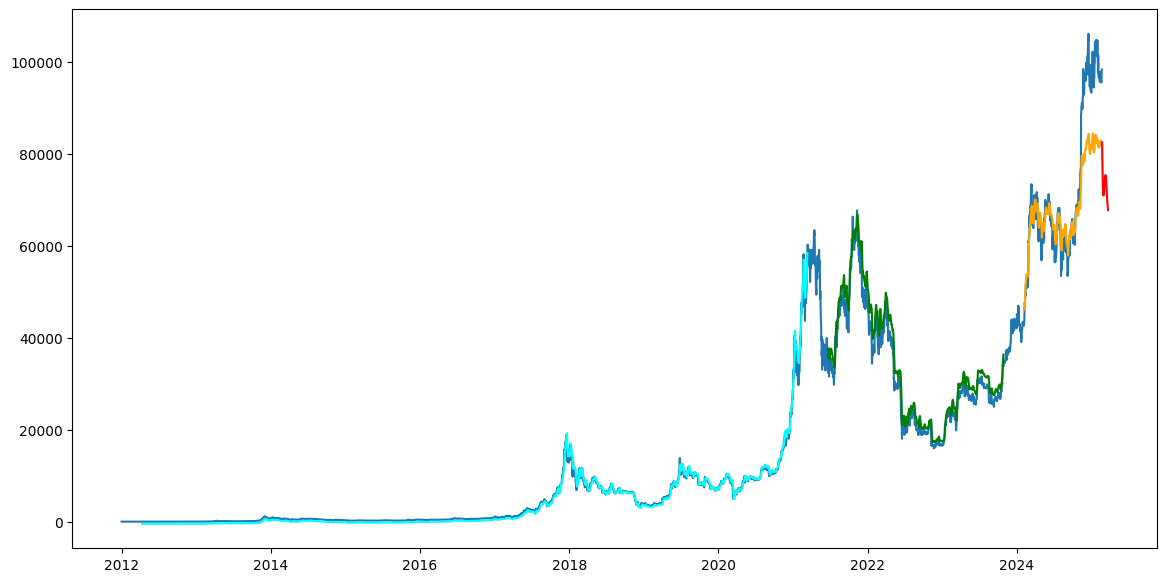

In [72]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df_daily)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

trainPredictPlot_df = pd.DataFrame(trainPredictPlot, index=df_daily.index, columns=['train_predict'])

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_daily)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_daily)-1-len(data_valid), :] = test_predict
testPredictPlot_df = pd.DataFrame(testPredictPlot, index=df_daily.index, columns=['test_predict'])

# shift validation for plotting
validPredictPlot = numpy.empty_like(df_daily)
validPredictPlot[:, :] = numpy.nan
validPredictPlot[len(train_predict)+len(test_predict)+(look_back*3)+2:len(df_daily)-1, :] = valid_predict
validPredictPlot_df = pd.DataFrame(validPredictPlot, index=df_daily.index, columns=['valid_predict'])

#shift predicition
FuturePredictPlot = numpy.empty((len(df_daily) + 30, 1))
FuturePredictPlot[:, :] = numpy.nan
FuturePredictPlot[len(df_daily):len(df_daily)+30, :] = future_predictions
future_dates = pd.date_range(start=df_daily.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
FuturePredictPlot_df = pd.DataFrame(FuturePredictPlot, index=df_daily.index.append(future_dates), columns=['future_predictions'])

# plot baseline and predictions
plt.figure(figsize=(14,7))
plt.plot(df_daily)
plt.plot(trainPredictPlot_df.index, trainPredictPlot_df, label="Prediksi Training", color='cyan')
plt.plot(testPredictPlot_df.index, testPredictPlot_df, label="Prediksi Testing", color='green')
plt.plot(validPredictPlot_df.index, validPredictPlot_df, label="Prediksi Validation", color='orange')
plt.plot(FuturePredictPlot_df.index, FuturePredictPlot_df, label="Prediksi 30 hari", color='red')
plt.show()

In [73]:
df_daily.tail()

,Close
Date,
2025-02-17,96060.0
2025-02-18,95612.0
2025-02-19,95564.0
2025-02-20,98337.0
2025-02-21,98426.0


## **ARIMA Model Building**

In [ ]:
path = "/content/drive/MyDrive/Portofolio_FityanSetyawan/Forecasting_bitcoin/btcusd_1-min_data.csv"
df4 = pd.read_csv(path)
df4.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [ ]:
!pip install --upgrade patsy

In [ ]:
!pip install statsmodels

In [ ]:
!pip install --upgrade --no-deps statsmodels

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
data_train_Arima = data_train.copy()
data_test_Arima = data_test.copy()
data_valid_Arima = data_valid.copy()


In [ ]:
data_train_Arima.head()

,Close
Date,
2012-01-01,4.84
2012-01-02,5.00
2012-01-03,5.29
2012-01-04,5.57
2012-01-05,6.42


In [ ]:
data_train_Arima1=data_train_Arima.reset_index()["Close"]
data_test_Arima1= data_test_Arima.reset_index()["Close"]
data_train_Arima1.head()

,Close
0,4.84
1,5.00
2,5.29
3,5.57
4,6.42


Uji ADF (Apakah data stasioner ?)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Uji stasioneritas
result = adfuller(data_train_Arima1)

print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("✅ Data sudah stasioner, tidak perlu differencing (d=0)")
else:
    print("❌ Data belum stasioner, perlu differencing (d=1 atau lebih)")

ADF Statistic: 7.778381047674246
p-value: 1.0
❌ Data belum stasioner, perlu differencing (d=1 atau lebih)


In [ ]:
train_diff = data_train_Arima1.diff().dropna()
result_diff = adfuller(train_diff)

print("ADF Statistic (Setelah Differencing):", result_diff[0])
print("p-value:", result_diff[1])

ADF Statistic (Setelah Differencing): -8.107455044109733
p-value: 1.251700062322039e-12


Sudah stasioner p < 0.05

ACF untuk menentukan parameter q dan pacf untuk menentukan parameter p

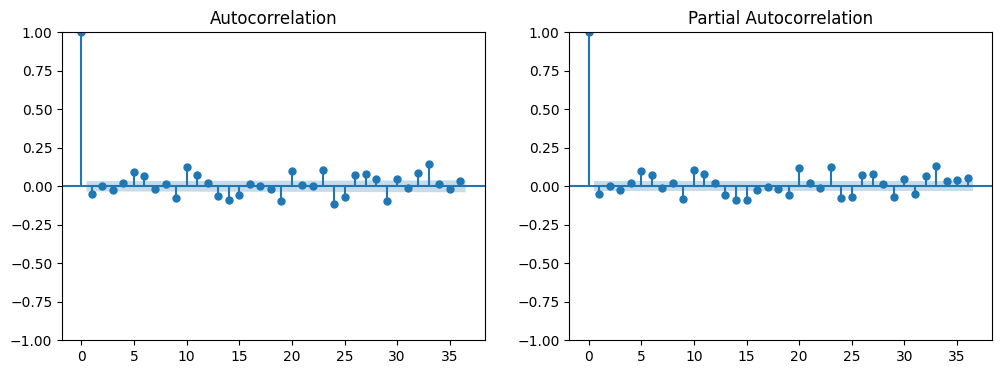

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF & PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(train_diff, ax=axes[0])
plot_pacf(train_diff, ax=axes[1])
plt.show()

q sebelum turun drastis adalah 1, sama halnya dengan p nilanya 1

**Implementasi Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit model ARIMA(1,1,1)
model = ARIMA(data_train_Arima1, order=(1, 1, 1))
model_fit = model.fit()

# Summary model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3360
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25233.671
Date:                Mon, 24 Feb 2025   AIC                          50473.342
Time:                        16:07:55   BIC                          50491.701
Sample:                             0   HQIC                         50479.908
                               - 3360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1061      0.095     -1.114      0.265      -0.293       0.081
ma.L1          0.0601      0.096      0.628      0.530      -0.127       0.248
sigma2      1.964e+05    919.615    213.551      0.0

p-value lebih besar dari 0.05 mungkin model kurang akurat

In [ ]:
model1 = ARIMA(data_train_Arima1, order=(3,1,3))
model_fit1 = model1.fit()
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3360
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -25188.087
Date:                Mon, 24 Feb 2025   AIC                          50390.175
Time:                        16:39:34   BIC                          50433.011
Sample:                             0   HQIC                         50405.494
                               - 3360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2227      0.010     21.559      0.000       0.202       0.243
ar.L2          0.3289      0.010     32.982      0.000       0.309       0.348
ar.L3         -0.8679      0.008   -113.246      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from sklearn.metrics import mean_squared_error
forecast_test = model_fit1.forecast(steps=len(data_test_Arima1))

rmse = np.sqrt(mean_squared_error(data_test_Arima1, forecast_test))
print(f"Test RMSE: {rmse}")


Test RMSE: 29182.14083838669


In [ ]:
forecast_test

,predicted_mean
3360,59947.424220
3361,60277.311001
3362,59922.097374
3363,60253.179403
3364,59923.756306
...,...
4315,60101.615048
4316,60101.502593
4317,60101.614107
4318,60101.503526


Model masih perlu perbaikan

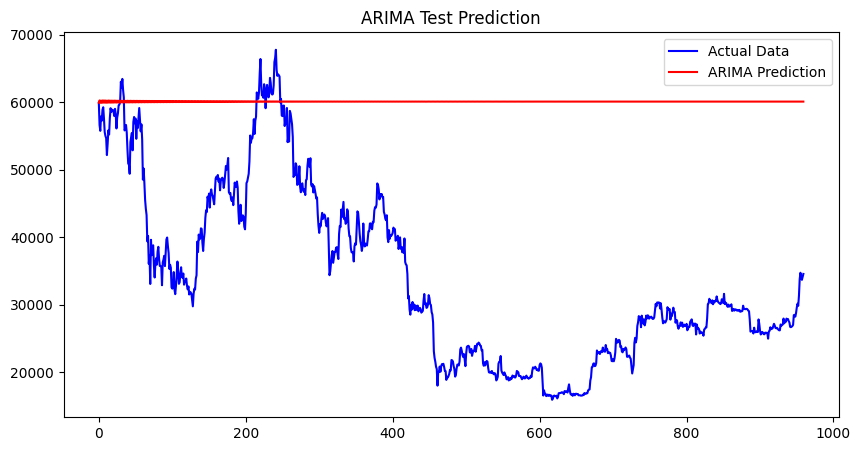

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data_test_Arima1.index, data_test_Arima1, label="Actual Data", color="blue")
plt.plot(data_test_Arima1.index, forecast_test, label="ARIMA Prediction", color="red")
plt.legend()
plt.title("ARIMA Test Prediction")
plt.show()

Hasil prediksi data test dengan aktualnya sangat jauh, Arima mungkin kurang bagus